In [1]:
import numpy as np

import keras as k
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import (
    Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D
)

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
k.backend.backend()

'tensorflow'

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
train_images = X_train.astype(np.float32) / 255
test_images = X_test.astype(np.float32) / 255

train_labels = y_train
test_labels = y_test

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

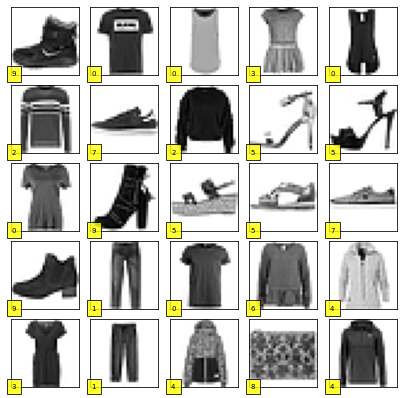

In [8]:
fig, ax = plt.subplots(5,5, figsize=(7,7),
                       subplot_kw={'xticks': [], 'yticks': []},
                       gridspec_kw={'hspace': 0.15, 'wspace': 0.1},
                       constrained_layout=False)
for i, axe in enumerate(ax.flatten()):
    axe.imshow(X_train[i], cmap='binary')
    axe.text(0, X_train[i].shape[0], y_train[i], fontdict={'size': 7},bbox={'facecolor': 'yellow', 'alpha': 0.8, 'pad': 5})

In [9]:
train_images = train_images.reshape(*(train_images.shape), 1)
test_images = test_images.reshape(*(test_images.shape), 1)

In [10]:
from keras import utils

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [14]:
## modelo de datos
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
%%time
model.fit(train_images, train_labels,
          batch_size=64,
          epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 50s 50ms/step - loss: 0.5725 - accuracy: 0.7927 - val_loss: 0.3968 - val_accuracy: 0.8570
Epoch 2/10
938/938 [==============================] - 42s 45ms/step - loss: 0.3962 - accuracy: 0.8586 - val_loss: 0.3280 - val_accuracy: 0.8814
Epoch 3/10
938/938 [==============================] - 43s 45ms/step - loss: 0.3507 - accuracy: 0.8751 - val_loss: 0.2991 - val_accuracy: 0.8962
Epoch 4/10
938/938 [==============================] - 43s 46ms/step - loss: 0.3280 - accuracy: 0.8807 - val_loss: 0.3109 - val_accuracy: 0.8922
Epoch 5/10
938/938 [==============================] - 43s 46ms/step - loss: 0.3182 - accuracy: 0.8866 - val_loss: 0.2861 - val_accuracy: 0.9000
Epoch 6/10
938/938 [==============================] - 42s 45ms/step - loss: 0.3129 - accuracy: 0.8895 - val_loss: 0.2859 - val_accuracy: 0.9011
Epoch 7/10
938/938 [==============================] - 42s 45ms/step - loss: 0.3088 - accuracy: 0.8912 - val_loss: 0.3038 - val_accuracy:

: 